# Green River Mammmoth Cave USGS Gauge Data (Site 03309000) Anlysis of flood events since removal of L&D6

In [1]:
## Installing libraries
# Install as needed.

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install requests

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 837.5 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/8.1 MB 837.5 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.1 MB 859.5 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/8.1 MB 898.8 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.1 MB 944.7 kB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.1 MB 953.2 kB/s eta 0:00:07
   --------- ------------------------------ 1.8/8.1 MB 986.7 kB/s eta 0:00:07
   ---------- ----------------------------- 2.1/8.1 MB 1.0 MB/s eta 0:00:06
   ----------- ---------------------------- 2.4/8.1 MB 1.0 MB/s eta 0:00:06
   ----------- ---------------------------- 2.4/8.1 MB 1.0 MB/s eta 0:00:06
   -------------- -

In [3]:
# Import Libraries and print Versions
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import os
import sys
import requests
import json

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)
import matplotlib
print("Matplotlib version: ", matplotlib.__version__)
print("Numpy version: ", np.__version__)

print("OS name: ", os.name)
print("Current working directory: ", os.getcwd())
print("Python executable: ", sys.executable)
print("Python path: ", sys.path)
print("Python modules: ", sys.modules)
print("Python platform: ", sys.platform)
print("Python version: ", sys.version)
print("Python version info: ", sys.version_info)



Python version:  3.12.7 | packaged by conda-forge | (main, Oct  4 2024, 15:47:54) [MSC v.1941 64 bit (AMD64)]
Pandas version:  2.2.3
Matplotlib version:  3.10.3
Numpy version:  2.2.4
OS name:  nt
Current working directory:  c:\PROJECTS\GRF-Water-Data\GreenRiverFerryRiver\01_Scripts
Python executable:  c:\Users\rkautzman\AppData\Local\miniforge3\python.exe
Python path:  ['c:\\Users\\rkautzman\\AppData\\Local\\miniforge3\\python312.zip', 'c:\\Users\\rkautzman\\AppData\\Local\\miniforge3\\DLLs', 'c:\\Users\\rkautzman\\AppData\\Local\\miniforge3\\Lib', 'c:\\Users\\rkautzman\\AppData\\Local\\miniforge3', '', 'c:\\Users\\rkautzman\\AppData\\Local\\miniforge3\\Lib\\site-packages', 'c:\\Users\\rkautzman\\AppData\\Local\\miniforge3\\Lib\\site-packages\\win32', 'c:\\Users\\rkautzman\\AppData\\Local\\miniforge3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\rkautzman\\AppData\\Local\\miniforge3\\Lib\\site-packages\\Pythonwin']
Python modules:  {'sys': <module 'sys' (built-in)>, 'builtins': <module

In [5]:
## USGS Gauge Data
url = 'https://nwis.waterservices.usgs.gov/nwis/iv/?sites=03309000&agencyCd=USGS&startDT=2018-01-01T00:00:00.000-06:00&endDT=2025-05-20T23:59:59.999-05:00&parameterCd=00065&format=rdb'

try: 
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for bad responses
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")
    # Handle the error appropriately (e.g., log it, retry, etc.)
    exit()

In [6]:
from io import StringIO

# Parse the response content and convert it into a DataFrame

# Decode the response content
content = response.content.decode('utf-8')

# Skip comment lines (lines starting with '#') and create a DataFrame
data_lines = "\n".join([line for line in content.splitlines() if not line.startswith('#')])
df = pd.read_csv(StringIO(data_lines), sep='\t')

# Display the first few rows of the DataFrame
print(df.head())

  agency_cd   site_no          datetime tz_cd 220645_00065 220645_00065_cd
0        5s       15s               20d    6s          14n             10s
1      USGS  03309000  2018-01-01 01:00   CST        20.15               A
2      USGS  03309000  2018-01-01 01:15   CST        20.16               A
3      USGS  03309000  2018-01-01 01:30   CST        20.15               A
4      USGS  03309000  2018-01-01 01:45   CST        20.15               A


C:\Users\rkautzman\AppData\Local\Temp\1\ipykernel_18184\1245403309.py:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(data_lines), sep='\t')


In [7]:
# Rename columns for clarity
df = df.rename(columns={"220645_00065_cd":"approved", "tz_cd":"timezone", "220645_00065":"gage"})

# Remove the first row of the DataFrame
df = df.iloc[1:]
# Reset the index of the DataFrame
df = df.reset_index(drop=True)
# Convert the 'dateTime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['year'] = df['datetime'].dt.year
# Create a new DataFrame with the desired columns       
df2 = df[['datetime', 'gage', 'month', 'day', 'year']]
df2.head()

,datetime,gage,month,day,year
0,2018-01-01 01:00:00,20.15,1,1,2018
1,2018-01-01 01:15:00,20.16,1,1,2018
2,2018-01-01 01:30:00,20.15,1,1,2018
3,2018-01-01 01:45:00,20.15,1,1,2018
4,2018-01-01 02:00:00,20.14,1,1,2018


C:\Users\rkautzman\AppData\Local\Temp\1\ipykernel_18184\3519027179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gage'] = pd.to_numeric(df2['gage'], errors='coerce')
C:\Users\rkautzman\AppData\Local\Temp\1\ipykernel_18184\3519027179.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


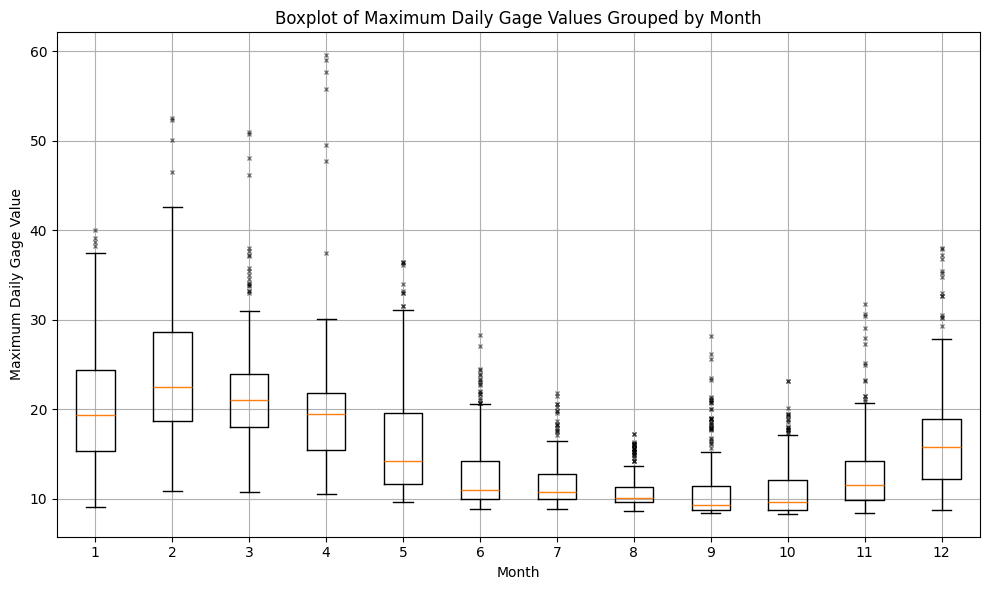

In [8]:
# Ensure the 'gage' column in df is numeric
df['gage'] = pd.to_numeric(df['gage'], errors='coerce')

# Ensure the 'gage' column in df2 is numeric
df2['gage'] = pd.to_numeric(df2['gage'], errors='coerce')

# Create a DataFrame of the maximum gauge value for each day
daily_max_df = df.groupby(df['datetime'].dt.date)['gage'].max().reset_index()
daily_max_df.columns = ['date', 'max_daily_gage']

# Add a month column to the daily_max_df
daily_max_df['month'] = pd.to_datetime(daily_max_df['date']).dt.month

# Group the maximum daily values by month
grouped_daily_max = daily_max_df.groupby('month')['max_daily_gage']

# Create a boxplot of the maximum daily values grouped by month
plt.figure(figsize=(10, 6))
plt.boxplot(
    [group for _, group in grouped_daily_max],
    labels=grouped_daily_max.groups.keys(),
    flierprops={
        'marker': 'x',  # Outlier marker symbol
        'markerfacecolor': 'red',  # Outlier marker color
        'markeredgecolor': 'black',  # Outlier marker edge color
        'markersize': 3,  # Outlier marker size
        'alpha': 0.5  # Outlier opacity
    }
)
plt.title('Boxplot of Maximum Daily Gage Values Grouped by Month')
plt.xlabel('Month')
plt.ylabel('Maximum Daily Gage Value')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Extract data for Janurary
month_1_data = daily_max_df[daily_max_df['month'] == 1]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_1_data.quantile(0.25)
Q3 = month_1_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 1) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
1121  2021-01-27           38.29      1
1456  2022-01-02           38.67      1
1457  2022-01-03           40.00      1
1458  2022-01-04           39.10      1


In [ ]:
# Extract data for February
month_2_data = daily_max_df[daily_max_df['month'] == 2]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_2_data.quantile(0.25)
Q3 = month_2_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 2) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
2583  2025-02-16           46.46      2
2584  2025-02-17           52.26      2
2585  2025-02-18           52.49      2
2586  2025-02-19           50.07      2


In [ ]:
# Extract data for March
month_3_data = daily_max_df[daily_max_df['month'] == 3]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_3_data.quantile(0.25)
Q3 = month_3_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 3) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
88    2018-03-30           33.88      3
89    2018-03-31           33.78      3
792   2020-03-03           33.17      3
793   2020-03-04           37.22      3
794   2020-03-05           37.07      3
802   2020-03-13           32.97      3
803   2020-03-14           34.50      3
804   2020-03-15           33.26      3
809   2020-03-20           34.00      3
810   2020-03-21           35.48      3
811   2020-03-22           34.99      3
1154  2021-03-01           46.12      3
1155  2021-03-02           50.76      3
1156  2021-03-03           50.94      3
1157  2021-03-04           48.02      3
1158  2021-03-05           35.80      3
2611  2025-03-16           34.08      3
2612  2025-03-17           37.96      3
2613  2025-03-18           37.67      3


In [ ]:
# Extract data for April
month_4_data = daily_max_df[daily_max_df['month'] == 4]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_4_data.quantile(0.25)
Q3 = month_4_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 4) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
2630  2025-04-04           47.73      4
2631  2025-04-05           57.67      4
2632  2025-04-06           59.54      4
2633  2025-04-07           58.99      4
2634  2025-04-08           55.82      4
2635  2025-04-09           49.47      4
2636  2025-04-10           37.50      4


In [ ]:
# Extract data for May
month_5_data = daily_max_df[daily_max_df['month'] == 5]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_5_data.quantile(0.25)
Q3 = month_5_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 5) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
1219  2021-05-05           36.41      5
1220  2021-05-06           36.42      5
2300  2024-05-09           33.16      5
2301  2024-05-10           36.35      5
2302  2024-05-11           36.10      5
2318  2024-05-27           31.59      5
2319  2024-05-28           33.01      5
2673  2025-05-17           33.01      5
2674  2025-05-18           33.94      5
2675  2025-05-19           31.55      5


In [14]:
# Extract data for June
month_6_data = daily_max_df[daily_max_df['month'] == 6]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_6_data.quantile(0.25)
Q3 = month_6_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 6) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
177   2018-06-27           21.02      6
178   2018-06-28           21.90      6
179   2018-06-29           21.23      6
180   2018-06-30           21.69      6
523   2019-06-08           22.72      6
524   2019-06-09           22.77      6
526   2019-06-11           20.74      6
537   2019-06-22           22.07      6
538   2019-06-23           23.42      6
539   2019-06-24           23.29      6
540   2019-06-25           24.44      6
541   2019-06-26           23.84      6
542   2019-06-27           21.69      6
909   2020-06-29           24.49      6
910   2020-06-30           23.91      6
1613  2022-06-08           20.68      6
1982  2023-06-26           27.11      6
1983  2023-06-27           28.32      6
1984  2023-06-28           23.08      6
2329  2024-06-07           20.66      6


In [15]:
# Extract data for July
month_7_data = daily_max_df[daily_max_df['month'] == 7]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_7_data.quantile(0.25)
Q3 = month_7_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 7) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
181   2018-07-01           21.44      7
182   2018-07-02           20.62      7
183   2018-07-03           20.56      7
184   2018-07-04           20.22      7
185   2018-07-05           19.56      7
186   2018-07-06           17.90      7
568   2019-07-23           18.71      7
569   2019-07-24           18.29      7
911   2020-07-01           17.71      7
914   2020-07-04           18.30      7
915   2020-07-05           17.53      7
1655  2022-07-22           21.82      7
1656  2022-07-23           18.33      7
1989  2023-07-03           19.76      7
1990  2023-07-04           19.78      7
1992  2023-07-06           17.52      7
1993  2023-07-07           17.08      7


In [16]:
# Extract data for August
month_8_data = daily_max_df[daily_max_df['month'] == 8]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_8_data.quantile(0.25)
Q3 = month_8_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 8) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
942   2020-08-01           15.27      8
943   2020-08-02           15.54      8
944   2020-08-03           15.22      8
949   2020-08-08           14.90      8
950   2020-08-09           14.58      8
955   2020-08-14           14.18      8
956   2020-08-15           14.21      8
1665  2022-08-01           14.82      8
1666  2022-08-02           15.29      8
1667  2022-08-03           16.10      8
1668  2022-08-04           15.98      8
1669  2022-08-05           15.69      8
1670  2022-08-06           15.05      8
1671  2022-08-07           16.08      8
1672  2022-08-08           16.35      8
1673  2022-08-09           15.99      8
1674  2022-08-10           16.17      8
1675  2022-08-11           16.22      8
1676  2022-08-12           14.23      8
1677  2022-08-13           15.55      8
1678  2022-08-14           15.54      8
1679  2022-08-15           15.02      8
1686  2022-08-22           15.62      8
1687  2022-08-23           15.72      8


In [17]:
# Extract data for September
month_9_data = daily_max_df[daily_max_df['month'] == 9]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_9_data.quantile(0.25)
Q3 = month_9_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 9) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
265   2018-09-23           16.45      9
266   2018-09-24           17.87      9
267   2018-09-25           23.48      9
268   2018-09-26           23.25      9
269   2018-09-27           18.59      9
270   2018-09-28           18.90      9
271   2018-09-29           20.74      9
272   2018-09-30           20.76      9
974   2020-09-02           16.70      9
975   2020-09-03           25.65      9
976   2020-09-04           28.18      9
977   2020-09-05           26.15      9
978   2020-09-06           20.83      9
979   2020-09-07           20.01      9
980   2020-09-08           19.05      9
981   2020-09-09           18.34      9
982   2020-09-10           17.85      9
983   2020-09-11           16.25      9
986   2020-09-14           21.24      9
987   2020-09-15           21.40      9
988   2020-09-16           18.96      9
989   2020-09-17           19.06      9
990   2020-09-18           18.89      9
991   2020-09-19           18.52      9


In [18]:
# Extract data for October
month_10_data = daily_max_df[daily_max_df['month'] == 10]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_10_data.quantile(0.25)
Q3 = month_10_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 10) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
273   2018-10-01           20.10     10
274   2018-10-02           19.33     10
275   2018-10-03           19.43     10
276   2018-10-04           19.42     10
277   2018-10-05           18.88     10
288   2018-10-16           23.13     10
289   2018-10-17           23.12     10
290   2018-10-18           19.24     10
291   2018-10-19           17.30     10
292   2018-10-20           18.01     10
293   2018-10-21           17.97     10
294   2018-10-22           17.73     10
295   2018-10-23           17.41     10
668   2019-10-31           18.56     10
1370  2021-10-08           18.76     10
1371  2021-10-09           17.71     10
2447  2024-10-03           17.86     10
2448  2024-10-04           17.78     10


In [19]:
# Extract data for November
month_11_data = daily_max_df[daily_max_df['month'] == 11]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_11_data.quantile(0.25)
Q3 = month_11_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 11) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

           date  max_daily_gage  month
309  2018-11-06           27.24     11
310  2018-11-07           30.45     11
311  2018-11-08           27.92     11
318  2018-11-15           29.04     11
319  2018-11-16           31.74     11
320  2018-11-17           30.65     11
321  2018-11-18           23.19     11
322  2018-11-19           21.19     11
323  2018-11-20           20.95     11
669  2019-11-01           21.49     11
695  2019-11-27           21.53     11
696  2019-11-28           24.90     11
697  2019-11-29           23.26     11
698  2019-11-30           25.13     11


In [20]:
# Extract data for December
month_12_data = daily_max_df[daily_max_df['month'] == 12]['max_daily_gage']

# Calculate Q1, Q3, and IQR
Q1 = month_12_data.quantile(0.25)
Q3 = month_12_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = daily_max_df[(daily_max_df['month'] == 12) & 
                        ((daily_max_df['max_daily_gage'] < lower_bound) | 
                         (daily_max_df['max_daily_gage'] > upper_bound))]

# Output the rows for outliers
print(outliers)

            date  max_daily_gage  month
335   2018-12-02           32.61     12
336   2018-12-03           32.69     12
699   2019-12-01           35.22     12
700   2019-12-02           37.25     12
701   2019-12-03           36.77     12
715   2019-12-17           34.78     12
716   2019-12-18           38.04     12
717   2019-12-19           37.89     12
728   2019-12-30           32.94     12
729   2019-12-31           35.39     12
1434  2021-12-11           29.25     12
1435  2021-12-12           30.17     12
2524  2024-12-19           30.51     12
2525  2024-12-20           30.26     12
